In [ ]:
#Задача 1 Загрузка данных

In [24]:
import sqlite3
import pandas as pd

# Указываем путь к файлу SQLite
sqlite_db_path = "D:/Эстер/с рс/Courses/ML Engineer/Attestation2/archive/sqlite-sakila.db"

# Подключаемся к SQLite
conn_sqlite = sqlite3.connect(sqlite_db_path)

# Получаем список всех таблиц
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn_sqlite)

print("Список таблиц в SQLite:")
print(tables)

# Закрываем соединение
conn_sqlite.close()


Список таблиц в SQLite:
             name
0           actor
1         country
2            city
3         address
4        language
5        category
6        customer
7            film
8      film_actor
9   film_category
10      film_text
11      inventory
12          staff
13          store
14        payment
15         rental


In [25]:
# Подключаемся снова
conn_sqlite = sqlite3.connect(sqlite_db_path)

# Загружаем таблицу в DataFrame
df_film = pd.read_sql("SELECT * FROM film", conn_sqlite)

# Закрываем соединение
conn_sqlite.close()

# Просматриваем первые строки
df_film.head()


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [26]:
from sqlalchemy import create_engine

# Данные для подключения
pg_user = "Ester"
pg_password = "2659"
pg_host = "localhost"
pg_db = "postgres"

# Создаём соединение
engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}/{pg_db}")

# Проверяем соединение
try:
    with engine.connect() as conn:
        print("Подключение к PostgreSQL успешно!")
except Exception as e:
    print("Ошибка подключения:", e)


Подключение к PostgreSQL успешно!


In [32]:
# Путь к базе данных SQLite
sqlite_db_path = "D:/Эстер/с рс/Courses/ML Engineer/Attestation2/archive/sqlite-sakila.db"

# Подключаемся к базе
conn_sqlite = sqlite3.connect(sqlite_db_path)
cursor = conn_sqlite.cursor()

# Проверяем внешние ключи в каждой таблице
foreign_keys_info = []
for table in tables["name"]:
    cursor.execute(f"PRAGMA foreign_key_list({table});")
    foreign_keys = cursor.fetchall()
    
    if foreign_keys:
        for fk in foreign_keys:
            foreign_keys_info.append({
                "Table": table,
                "FK Column": fk[3],  # Имя внешнего ключа
                "References Table": fk[2],  # Таблица, на которую ссылается
                "PK Column": fk[4]  # Первичный ключ в родительской таблице
            })

# Выводим в виде таблицы
fk_df = pd.DataFrame(foreign_keys_info)
if not fk_df.empty:
    print("\nОтношения (Foreign Keys):")
    print(fk_df)
else:
    print("\nВ базе данных нет внешних ключей!")

# Закрываем соединение
conn_sqlite.close()



Отношения (Foreign Keys):
            Table             FK Column References Table     PK Column
0            city            country_id          country    country_id
1         address               city_id             city       city_id
2        customer            address_id          address    address_id
3        customer              store_id            store      store_id
4            film  original_language_id         language   language_id
5            film           language_id         language   language_id
6      film_actor               film_id             film       film_id
7      film_actor              actor_id            actor      actor_id
8   film_category           category_id         category   category_id
9   film_category               film_id             film       film_id
10      inventory               film_id             film       film_id
11      inventory              store_id            store      store_id
12          staff            address_id          a

In [27]:
# Загружаем DataFrame в PostgreSQL
df_film.to_sql("film", engine, if_exists="replace", index=False)

print("Данные успешно загружены в PostgreSQL!")


Данные успешно загружены в PostgreSQL!


In [28]:
# Читаем данные из PostgreSQL
df_pg = pd.read_sql("SELECT * FROM film", engine)
df_pg.head()


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [ ]:
#Задача 2 Подключение к БД и выполнение запросов

In [40]:
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy.orm import sessionmaker


In [41]:
# Подключаемся к базе данных SQLite
db_path = "D:/Эстер/с рс/Courses/ML Engineer/Attestation2/archive/sqlite-sakila.db"
engine = create_engine(f"sqlite:///{db_path}")
Session = sessionmaker(bind=engine)
session = Session()

# Определяем базовый класс для таблиц
Base = declarative_base()

# Пример классов для таблиц (не все таблицы, только основные)
class Film(Base):
    __tablename__ = 'film'
    film_id = Column(Integer, primary_key=True)
    title = Column(String)
    description = Column(String)
    release_year = Column(Integer)
    language_id = Column(Integer, ForeignKey('language.language_id'))
    rental_duration = Column(Integer)
    rental_rate = Column(Float)
    length = Column(Integer)
    replacement_cost = Column(Float)
    rating = Column(String)
    special_features = Column(String)

class Category(Base):
    __tablename__ = 'category'
    category_id = Column(Integer, primary_key=True)
    name = Column(String)

class FilmCategory(Base):
    __tablename__ = 'film_category'
    film_id = Column(Integer, ForeignKey('film.film_id'), primary_key=True)
    category_id = Column(Integer, ForeignKey('category.category_id'), primary_key=True)

class Rental(Base):
    __tablename__ = 'rental'
    rental_id = Column(Integer, primary_key=True)
    rental_date = Column(String)
    inventory_id = Column(Integer, ForeignKey('inventory.inventory_id'))
    customer_id = Column(Integer, ForeignKey('customer.customer_id'))
    return_date = Column(String)

# Проверяем подключение
print("База данных подключена успешно!")

База данных подключена успешно!


C:\Users\gis\AppData\Local\Temp\ipykernel_8180\3808218743.py:8: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [44]:
import pandas as pd

# Функция для сохранения результата запроса в CSV
def save_query_to_csv(query, filename):
    df = pd.read_sql(query, con=engine)
    df.to_csv(filename, index=False)
    print(f"Результат сохранён в {filename}")

# 1. Доля фильмов в каждой рейтинговой категории
query1 = "SELECT rating, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM film) AS percentage FROM film GROUP BY rating;"
save_query_to_csv(query1, "rating_distribution.csv")

# 2. Самые популярные категории фильмов
query2 = """
    SELECT c.name AS category, COUNT(r.rental_id) AS rental_count
    FROM rental r
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN film f ON i.film_id = f.film_id
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name
    ORDER BY rental_count DESC;
"""
save_query_to_csv(query2, "popular_categories.csv")

# 3. Средняя продолжительность проката по категориям
query3 = """
    SELECT c.name AS category, AVG(f.rental_duration) AS avg_rental_duration
    FROM film f
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name;
"""
save_query_to_csv(query3, "avg_rental_duration.csv")

# 4. Ежемесячный доход от аренды фильмов за прошлый год
query4 = """
    SELECT strftime('%Y-%m', payment_date) AS month, SUM(amount) AS revenue
FROM payment
WHERE payment_date >= date('now', '-1 year')
GROUP BY month
ORDER BY month;
"""
save_query_to_csv(query4, "monthly_revenue.csv")

# 5. Сравнение продаж по магазинам
query5 = """
    SELECT s.store_id, SUM(p.amount) AS total_sales
    FROM payment p
    JOIN rental r ON p.rental_id = r.rental_id
    JOIN customer c ON r.customer_id = c.customer_id
    JOIN store s ON c.store_id = s.store_id
    GROUP BY s.store_id;
"""
save_query_to_csv(query5, "store_sales.csv")

# 6. Средняя стоимость замены фильмов по жанрам
query6 = """
    SELECT c.name AS category, AVG(f.replacement_cost) AS avg_replacement_cost
    FROM film f
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name;
"""
save_query_to_csv(query6, "replacement_cost.csv")

# 7. Актёры, снявшиеся в самых разных жанрах
query7 = """
    SELECT a.actor_id, a.first_name, a.last_name, COUNT(DISTINCT c.category_id) AS genre_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    JOIN film_category fc ON fa.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY a.actor_id
    ORDER BY genre_count DESC
    LIMIT 10;
"""
save_query_to_csv(query7, "top_actors.csv")


Результат сохранён в rating_distribution.csv
Результат сохранён в popular_categories.csv
Результат сохранён в avg_rental_duration.csv
Результат сохранён в monthly_revenue.csv
Результат сохранён в store_sales.csv
Результат сохранён в replacement_cost.csv
Результат сохранён в top_actors.csv


C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="percentage", data=df1, palette="viridis")


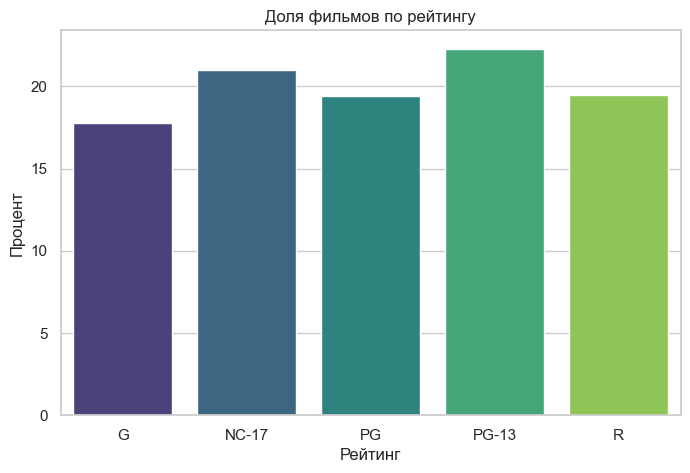

C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="rental_count", data=df2, palette="magma")


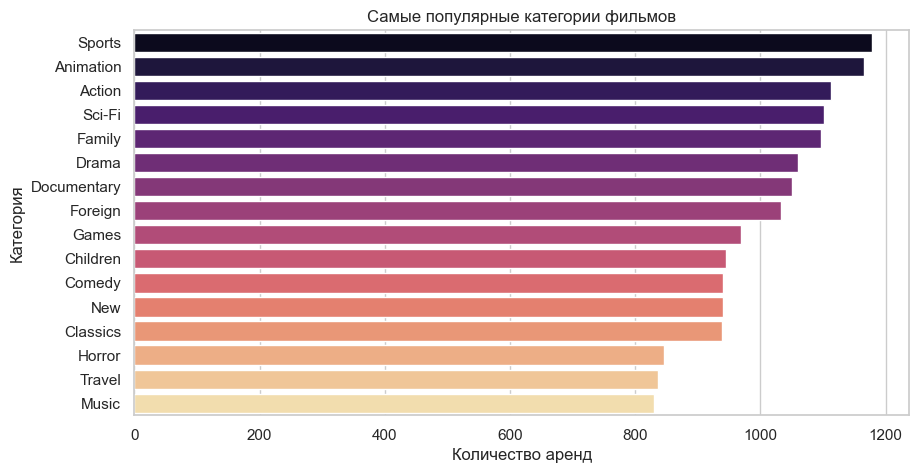

C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="avg_rental_duration", data=df3, palette="coolwarm")


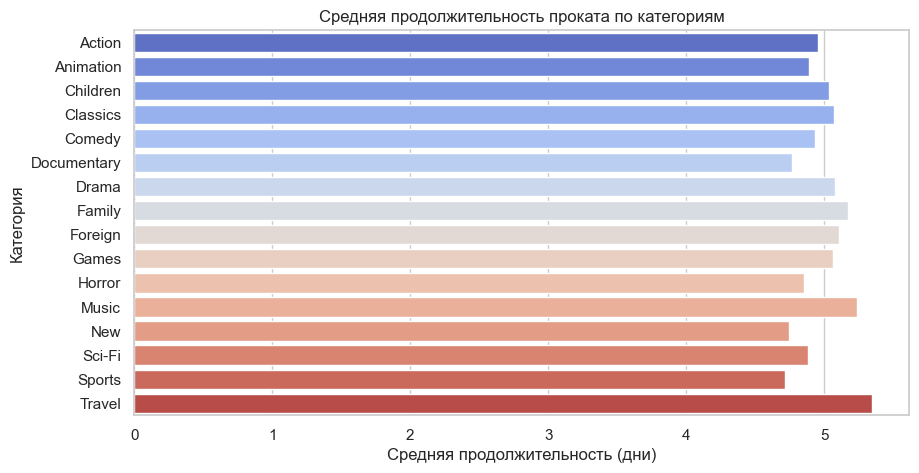

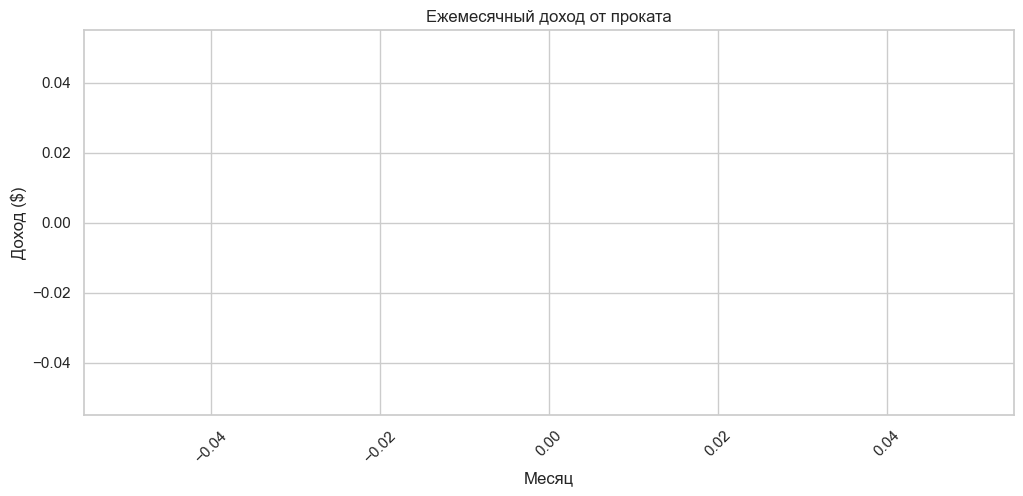

C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="store_id", y="total_sales", data=df5, palette="pastel")


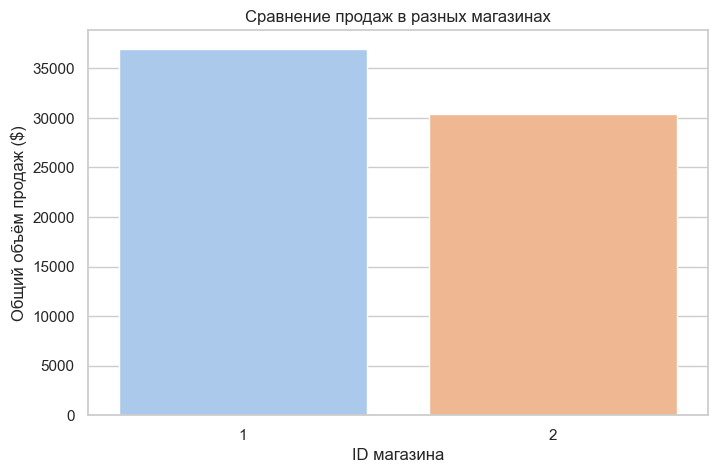

C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="category", x="avg_replacement_cost", data=df6, palette="Set2")


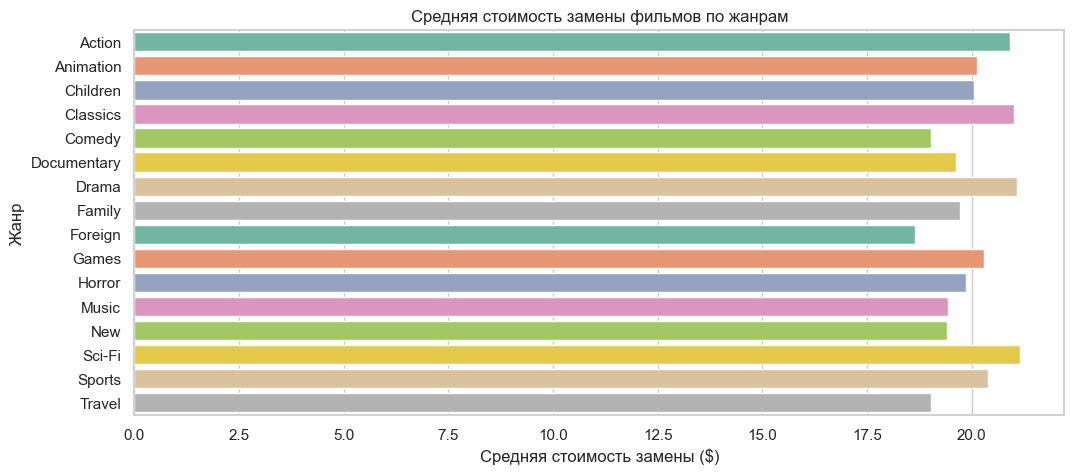

C:\Users\gis\AppData\Local\Temp\ipykernel_8180\782806386.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df7["first_name"] + " " + df7["last_name"], x="genre_count", data=df7, palette="flare")


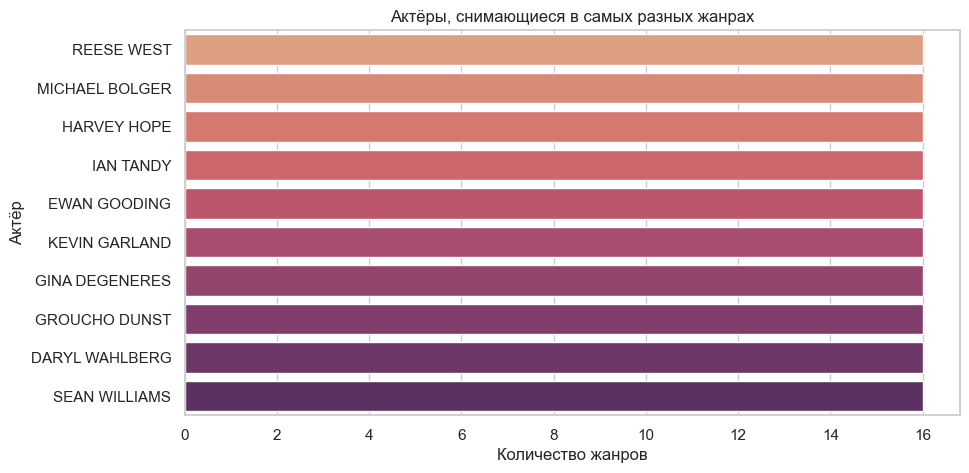

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль графиков
sns.set(style="whitegrid")

# 1. Доля фильмов по рейтингу
df1 = pd.read_csv("rating_distribution.csv")
plt.figure(figsize=(8, 5))
sns.barplot(x="rating", y="percentage", data=df1, palette="viridis")
plt.title("Доля фильмов по рейтингу")
plt.xlabel("Рейтинг")
plt.ylabel("Процент")
plt.show()

# 2. Самые популярные категории фильмов
df2 = pd.read_csv("popular_categories.csv")
plt.figure(figsize=(10, 5))
sns.barplot(y="category", x="rental_count", data=df2, palette="magma")
plt.title("Самые популярные категории фильмов")
plt.xlabel("Количество аренд")
plt.ylabel("Категория")
plt.show()

# 3. Средняя продолжительность проката по категориям
df3 = pd.read_csv("avg_rental_duration.csv")
plt.figure(figsize=(10, 5))
sns.barplot(y="category", x="avg_rental_duration", data=df3, palette="coolwarm")
plt.title("Средняя продолжительность проката по категориям")
plt.xlabel("Средняя продолжительность (дни)")
plt.ylabel("Категория")
plt.show()

# 4. Ежемесячный доход от проката
df4 = pd.read_csv("monthly_revenue.csv")
plt.figure(figsize=(12, 5))
sns.lineplot(x="month", y="revenue", data=df4, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Ежемесячный доход от проката")
plt.xlabel("Месяц")
plt.ylabel("Доход ($)")
plt.show()

# 5. Сравнение продаж в разных магазинах
df5 = pd.read_csv("store_sales.csv")
plt.figure(figsize=(8, 5))
sns.barplot(x="store_id", y="total_sales", data=df5, palette="pastel")
plt.title("Сравнение продаж в разных магазинах")
plt.xlabel("ID магазина")
plt.ylabel("Общий объём продаж ($)")
plt.show()

# 6. Средняя стоимость замены фильмов по жанрам
df6 = pd.read_csv("replacement_cost.csv")
plt.figure(figsize=(12, 5))
sns.barplot(y="category", x="avg_replacement_cost", data=df6, palette="Set2")
plt.title("Средняя стоимость замены фильмов по жанрам")
plt.xlabel("Средняя стоимость замены ($)")
plt.ylabel("Жанр")
plt.show()

# 7. Актёры, снимающиеся в самых разных жанрах
df7 = pd.read_csv("top_actors.csv")
plt.figure(figsize=(10, 5))
sns.barplot(y=df7["first_name"] + " " + df7["last_name"], x="genre_count", data=df7, palette="flare")
plt.title("Актёры, снимающиеся в самых разных жанрах")
plt.xlabel("Количество жанров")
plt.ylabel("Актёр")
plt.show()


In [ ]:
#Задача 3. Статистический анализ и визуализация данных

In [47]:
#Используем SQL-запрос для объединения данных. Свяжем таблицы по ключам
query = '''
SELECT 
    r.rental_id, r.rental_date, r.return_date, r.customer_id, 
    c.first_name || ' ' || c.last_name AS customer_name, c.email, c.active, 
    p.amount, p.payment_date, 
    f.film_id, f.title, f.release_year, f.rental_duration, f.rental_rate, f.length, 
    f.rating, cat.name AS category, 
    i.store_id
FROM rental r
JOIN customer c ON r.customer_id = c.customer_id
JOIN payment p ON r.rental_id = p.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category cat ON fc.category_id = cat.category_id;
'''


In [48]:
#Экспорт данных в CSV
import pandas as pd
from sqlalchemy import create_engine

# Подключение к SQLite
db_path = "D:/Эстер/с рс/Courses/ML Engineer/Attestation2/archive/sqlite-sakila.db"
engine = create_engine(f"sqlite:///{db_path}")

# SQL-запрос
query = """
    SELECT 
        r.rental_id, r.rental_date, r.return_date, r.customer_id, 
        c.first_name || ' ' || c.last_name AS customer_name, c.email, c.active, 
        p.amount, p.payment_date, 
        f.film_id, f.title, f.release_year, f.rental_duration, f.rental_rate, f.length, 
        f.rating, cat.name AS category, 
        i.store_id
    FROM rental r
    JOIN customer c ON r.customer_id = c.customer_id
    JOIN payment p ON r.rental_id = p.rental_id
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN film f ON i.film_id = f.film_id
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category cat ON fc.category_id = cat.category_id;
"""

# Загружаем в Pandas DataFrame
df = pd.read_sql(query, con=engine)

# Сохраняем в CSV
csv_path = "D:/Эстер/с рс/Courses/ML Engineer/Attestation2/merged_data.csv"
df.to_csv(csv_path, index=False)
print(f"Общая таблица сохранена в {csv_path}")


Общая таблица сохранена в D:/Эстер/с рс/Courses/ML Engineer/Attestation2/merged_data.csv


In [50]:
#Анализ числовых данных
# Подсчет пропусков
missing_values = df.isnull().sum() / len(df)

# Основные статистики для числовых переменных
num_stats = df.describe().T
num_stats["missing_ratio"] = missing_values

# Добавим квантили 0.1 и 0.9
num_stats["quantile_0.1"] = df.select_dtypes(include=["number"]).quantile(0.1)
num_stats["quantile_0.9"] = df.select_dtypes(include=["number"]).quantile(0.9)

# Сохраняем числовые данные в CSV
num_stats.to_csv("D:/Эстер/с рс/Courses/ML Engineer/Attestation2/numeric_analysis.csv")
print("Анализ числовых данных сохранен.")


Анализ числовых данных сохранен.


In [52]:
# Анализ категориальных данных
# Функция для анализа категориальных переменных
def categorical_analysis(df):
    cat_data = {}
    for col in df.select_dtypes(include=["object"]).columns:
        cat_data[col] = {
            "missing": df[col].isna().sum(),  # Исправлено: строка теперь корректно закрыта
            "unique_values": df[col].nunique(),
            "top_value": df[col].mode()[0] if not df[col].mode().empty else None,
            "top_value_count": df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0
        }
    return cat_data
